# AutoEncode
---
 - 표현(특징) 학습
   - 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
 - 구성
   - 인코더(Encoder): 입력 데이터에서 주요 특징 추출 / 압축
   - 디코더(Decoder): 주요 특징에서 원 데이터로 복원

In [6]:
from keras.datasets.mnist import load_data
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense


import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩

In [7]:
# 학습용 : 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

# 검증용 데이터셋 준비
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=42)

In [8]:
x_train.shape, x_val.shape, x_test.shape

((45000, 28, 28), (15000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [4]:
# 스케일링
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [5]:
# reshape
x_train=x_train.reshape(-1,784)
x_val=x_val.reshape(-1, 784)
x_test=x_test.reshape(-1, 784)

In [110]:
# 원핫인코딩으로 변환
from sklearn.preprocessing import OneHotEncoder

# y_train
encoder=OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train=encoder.transform(y_train.reshape(-1,1))
y_train=y_train.toarray()

In [111]:
# y_val, y_test
encoder.fit(y_test.reshape(-1,1))
y_test=encoder.transform(y_test.reshape(-1,1))
y_test=y_test.toarray()
encoder.fit(y_val.reshape(-1,1))
y_val=encoder.transform(y_val.reshape(-1,1))
y_val=y_val.toarray()

### [3] 모델 생성

In [112]:
set_random_seed(11)

In [113]:
# 모델 생성 함수

def createModel(n_node):
    model=Sequential()
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [114]:
Model_1=createModel(1)
Model_2=createModel(2)
Model_4=createModel(4)

In [115]:
Model_1.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1)                 785       
                                                                 
 dense_59 (Dense)            (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


### [4] 모델 학습

In [ ]:
# x, y값 모두 입력데이트
Model_1.fit(x_train, x_train, epochs=10)

In [117]:
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

In [118]:
pre_out=Model_1.predict(x_val[:1])

1/1 [==============================] - 0s 95ms/step


In [119]:
pre_out.shape

(1, 784)

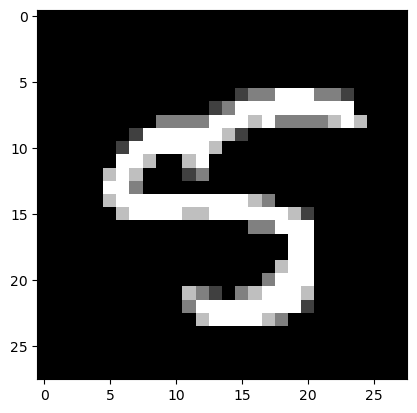

In [120]:
plt.imshow(x_val[0].reshape(28,28), cmap='gray')
plt.show()

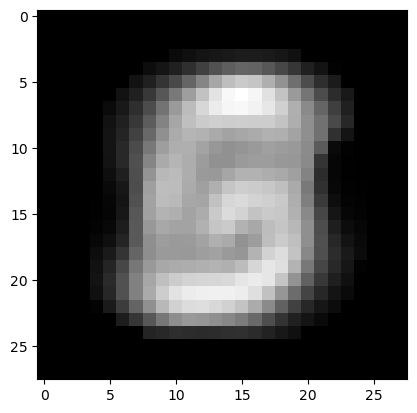

In [121]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()

In [133]:
def node_model(n_node):
    model=createModel(n_node)
    model.fit(x_train, x_train, epochs=10,verbose=False)
    
    pre_out=model.predict(x_val[:1])

    plt.imshow(pre_out.reshape(28,28), cmap='gray')
    plt.show()

1/1 [==============================] - 0s 99ms/step


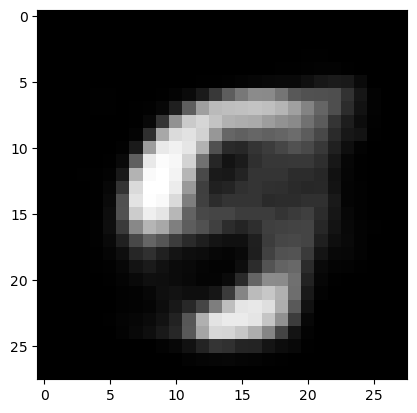

In [134]:
node_model(10)

1/1 [==============================] - 0s 79ms/step


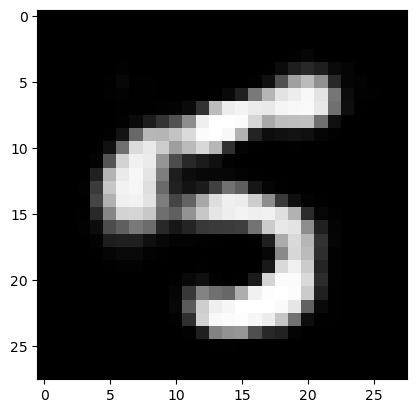

In [136]:
node_model(25)

1/1 [==============================] - 0s 66ms/step


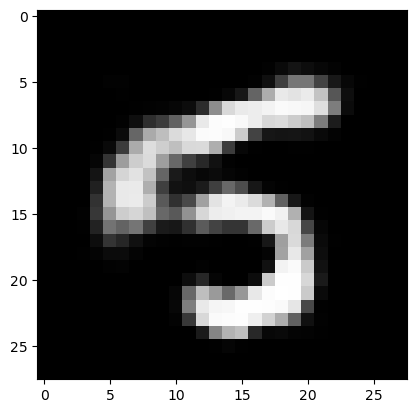

In [137]:
node_model(30)

1/1 [==============================] - 0s 122ms/step


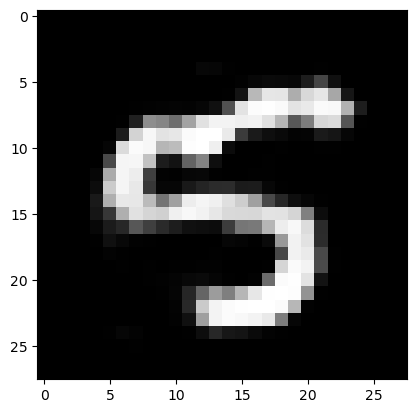

In [138]:
node_model(50)